[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19)]


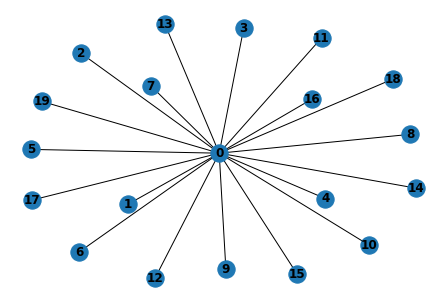

In [65]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([i for i in range(10)])
for i in range(1, 20):
    G.add_edge(0, i)

print(G.edges)
nx.draw(G, with_labels=True, font_weight='bold')
length = dict(nx.all_pairs_shortest_path_length(G))
d = dict(nx.all_pairs_shortest_path_length(G))

In [68]:
d = dict(nx.all_pairs_shortest_path_length(G))
v = len(G.nodes)

def value(G, S):  
    G_S = nx.induced_subgraph(G, S)
    #nx.draw(G_S, with_labels=True, font_weight='bold')
    conn_comp_S = nx.connected_components(G_S)
    value = 0
    for comp in conn_comp_S:
        value += len(comp)*len(comp)
    return value
    
def shapley_sub_count(G, i, a, b):
    k = d[i][a]+d[i][b]
    if k == 0:
        return v
    sub_count = 0.0
    for s in range(k, v):
        prod = 1
        for p in range(1, k+1):
            prod *= (s+1-p)/(v-p)
        sub_count += prod
    return sub_count
    
def shapley(G, i):
    shapley = 0.0
    anc = dict(nx.tree_all_pairs_lowest_common_ancestor(nx.dfs_tree(G,i), i))
    #nx.draw(nx.dfs_tree(G, i), with_labels=True, font_weight='bold')
    for a in G.nodes:
        for b in G.nodes:
            try:
                anc_ab = anc[(a,b)]
            except KeyError:
                anc_ab = anc[(b,a)]
            if anc_ab == i:
                shapley += shapley_sub_count(G, i, a, b)
    return shapley/v

print((v-1)*shapley(G, 1))
print(shapley(G, 0))
print(value(G,G))

265.99999999999994
133.99999999999977
400
